# Sentiment Analysis of IMDB Movie Using Natural Language Processing

### Load the libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### Load the dataset

In [2]:
df = pd.read_csv('csv_files/IMDB_sample.csv')

### Extract the first 5 data

In [3]:
df.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


### Remove the 'Unnamed: 0' from the dataset

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


### Extract the total rows and column

In [6]:
df.shape

(7501, 2)

In [7]:
print('Total Number of Row: {}'.format(df.shape[0]))
print('Total Number of Column: {}'.format(df.shape[1]))

Total Number of Row: 7501
Total Number of Column: 2


In [8]:
df['review'][3]

"The master of movie spectacle Cecil B. De Mille goes West. Using three legends of the old west as its protagonists (they probably never met),Gary Cooper is portraying Wild Bill Hickock,James Ellison as Buffalo Bill and Jean Arthur does make a nice Calamity Jane. The story serves only for De Mille to hang some marvelous action sequences on, like the big Indian attack.Scenes like that are extremely well done.If you don't mind the somewhat over-the-top performances of the cast this is an very entertaining western.Look out for a very young Anthony Quinn essaying the role of an Indian brave who participated at the battle of Little Big Horn.This part got him at least noticed in Hollywood."

In [9]:
df['label'].value_counts()

label
0    3782
1    3719
Name: count, dtype: int64

### Tokenize the dataset

In [10]:
word_tokens = [word_tokenize(review) for review in df.review]

In [11]:
print(len(word_tokens[134]))

64


### Create new column (n_column) to find the length of character per row

In [12]:
len_tokens = []
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

df['n_words'] = len_tokens

In [13]:
df.head()

,review,label,n_words
0,This short spoof can be found on Elite's Mille...,0,155
1,A singularly unfunny musical comedy that artif...,0,645
2,"An excellent series, masterfully acted and dir...",1,121
3,The master of movie spectacle Cecil B. De Mill...,1,128
4,I was gifted with this movie as it had such a ...,0,248


### Extract only the review column

In [14]:
review = df['review'].str.cat(sep=' ')

### Total character in the dataset

In [15]:
len(review)

9926862

### Word Cloud

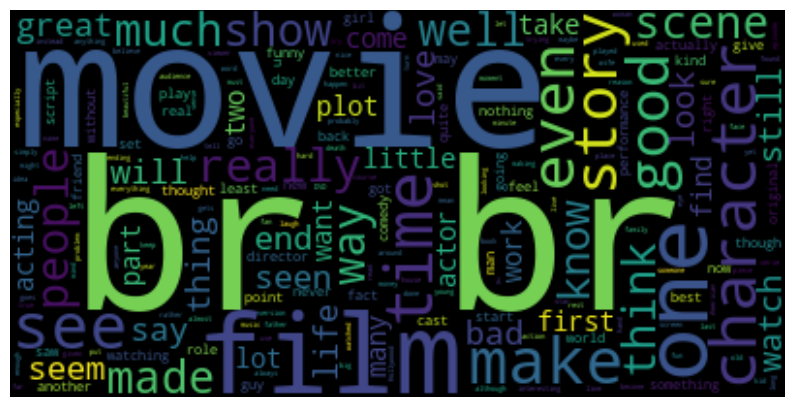

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
cloud_df = WordCloud(background_color='black').generate(review)
plt.imshow(cloud_df, interpolation='bilinear')
plt.axis('off')
plt.show()

### Build a Vectorizer (Tfidf) transformation

In [17]:
vect = TfidfVectorizer(max_features=200, ngram_range=(1, 2))

In [18]:
vect.fit(df.review)

TfidfVectorizer(max_features=200, ngram_range=(1, 2))

In [19]:
X = vect.transform(df.review)

In [20]:
df_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

### Extract the Top 5 Rows

In [21]:
df_transformed.head()

,10,about,acting,actors,actually,after,all,all the,also,an,...,who,why,will,with,with the,work,would,years,you,your
0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.051504,0.000000,0.000000,0.080425,0.0,0.000000,0.000000
1,0.047413,0.0,0.039573,0.04605,0.0,0.000000,0.077394,0.090133,0.037003,0.026883,...,0.000000,0.0,0.07544,0.150115,0.038108,0.000000,0.066974,0.0,0.075176,0.087924
2,0.000000,0.0,0.000000,0.00000,0.0,0.141987,0.000000,0.000000,0.000000,0.098387,...,0.000000,0.0,0.00000,0.156970,0.139470,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.182458,...,0.095607,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.085038,0.000000
4,0.096752,0.0,0.000000,0.00000,0.0,0.000000,0.157932,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.087522,0.000000,0.095085,0.000000,0.0,0.000000,0.000000


In [22]:
y = df.label

In [23]:
y

0       0
1       0
2       1
3       1
4       0
       ..
7496    1
7497    1
7498    0
7499    1
7500    1
Name: label, Length: 7501, dtype: int64

In [24]:
X.shape

(7501, 200)

In [25]:
y.shape

(7501,)

### Build a binary clasifier predicting the sentiment of the label

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

In [27]:
log_reg = LogisticRegression(random_state=16)

In [28]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [29]:
y_predict = log_reg.predict(X_test)

### Evaluate the performance of the model on the test set

In [30]:
print('Accuracy on the test set: {}'.format(accuracy_score(y_test, y_predict)))
print('*'*53)
print('Classification Report: \n')
print(classification_report(y_test, y_predict))
print('*'*53)
print('Confusion Matrix Result: \n')
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix/len(y_test))

Accuracy on the test set: 0.7554963357761493
*****************************************************
Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       768
           1       0.74      0.77      0.75       733

    accuracy                           0.76      1501
   macro avg       0.76      0.76      0.76      1501
weighted avg       0.76      0.76      0.76      1501

*****************************************************
Confusion Matrix Result: 

[[0.3817455  0.12991339]
 [0.11459027 0.37375083]]


### SVC Model

In [31]:
svc = SVC()

In [32]:
svc.fit(X_train, y_train)

SVC()

In [33]:
y_pred_svc = svc.predict(X_test)

### Evaluate the SVC model performance on the test set

In [34]:
print('SVC Accuracy on the test set: {}'.format(accuracy_score(y_test, y_pred_svc)))
print('*'*53)
print('Classification Report: \n')
print(classification_report(y_test, y_pred_svc))
print('*'*53)
print('Confusion Matrix Result: \n')
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix/len(y_test))

SVC Accuracy on the test set: 0.765489673550966
*****************************************************
Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       768
           1       0.76      0.76      0.76       733

    accuracy                           0.77      1501
   macro avg       0.77      0.77      0.77      1501
weighted avg       0.77      0.77      0.77      1501

*****************************************************
Confusion Matrix Result: 

[[0.3964024  0.1152565 ]
 [0.11925383 0.36908728]]


### LinearSVC Nodel

In [35]:
svc_linear = LinearSVC()

In [36]:
svc_linear.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [37]:
y_pred_linear = svc_linear.predict(X_test)

### Evaluate the SVC model performance on the test set

In [38]:
print('SVC Accuracy on the test set: {}'.format(accuracy_score(y_test, y_pred_linear)))
print('*'*53)
print('Classification Report: \n')
print(classification_report(y_test, y_pred_linear))
print('*'*53)
print('Confusion Matrix Result: \n')
conf_matrix = confusion_matrix(y_test, y_pred_linear)
print(conf_matrix/len(y_test))

SVC Accuracy on the test set: 0.7548301132578281
*****************************************************
Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       768
           1       0.75      0.76      0.75       733

    accuracy                           0.75      1501
   macro avg       0.75      0.75      0.75      1501
weighted avg       0.75      0.75      0.75      1501

*****************************************************
Confusion Matrix Result: 

[[0.38574284 0.12591606]
 [0.11925383 0.36908728]]


##### LInear SVC model has the best accuracy. Therefore it is the best choice for predicting the unseen data

### Prediction of model on unseen data

In [39]:
x = 'This movie is really good. Thanks a lot for making it.'

In [40]:
testing = vect.transform([x])

In [41]:
testing.shape

(1, 200)

In [42]:
svc_linear.predict(testing)

array([1], dtype=int64)

In [43]:
x = 'This movie is scary and bad. It is not good at all for kids.'
testing = vect.transform([x])
print(testing.shape)
print(svc_linear.predict(testing))

(1, 200)
[0]


In [44]:
x = 'This short spoof can be found on Elite\'s Millennium Edition DVD of "Night of the Living Dead". Good thing to as I would have never went even a tad out of my way to see it.Replacing zombies with bread sounds just like silly harmless fun on paper. In execution, it\'s a different matter. This short didn\'t even elicit a chuckle from me. I really never thought I\'d say this, but "Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Alien, Flesh Eating, Hellbound, Zombified Living Dead Part 2: In Shocking 2-D" was a VERY better parody and not nearly as lame or boring.<br /><br />My Grade: F'
testing = vect.transform([x])
print(testing.shape)
print(svc_linear.predict(testing))

(1, 200)
[0]


In [45]:
x = "The master of movie spectacle Cecil B. De Mille goes West. Using three legends of the old west as its protagonists (they probably never met),Gary Cooper is portraying Wild Bill Hickock,James Ellison as Buffalo Bill and Jean Arthur does make a nice Calamity Jane. The story serves only for De Mille to hang some marvelous action sequences on, like the big Indian attack.Scenes like that are extremely well done.If you don't mind the somewhat over-the-top performances of the cast this is an very entertaining western.Look out for a very young Anthony Quinn essaying the role of an Indian brave who participated at the battle of Little Big Horn.This part got him at least noticed in Hollywood."
testing = vect.transform([x])
print(testing.shape)
print(svc_linear.predict(testing))

(1, 200)
[1]
